In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from KNN import KNN
from sklearn.model_selection import train_test_split

In this notebook I will use my own implemented K-NN model to predict breast cancer. The dataset is available in Kaggle:  https://www.kaggle.com/uciml/breast-cancer-wisconsin-data?select=data.csv

In [2]:
df = pd.read_csv('data.csv')    #load data

For better visualization purposes I chose two random columns as my covariates: `radius mean` and `texture mean`

In [3]:
df = df[['radius_mean', 'texture_mean', 'diagnosis']]

In [4]:
df.head()

,radius_mean,texture_mean,diagnosis
0,17.99,10.38,M
1,20.57,17.77,M
2,19.69,21.25,M
3,11.42,20.38,M
4,20.29,14.34,M


In [5]:
df.diagnosis = np.where(df.diagnosis == 'M', 1, 0)   #encode, but not necessary

In [6]:
df.head()

,radius_mean,texture_mean,diagnosis
0,17.99,10.38,1
1,20.57,17.77,1
2,19.69,21.25,1
3,11.42,20.38,1
4,20.29,14.34,1


In [7]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

#Split the data to training and testing sets
#KNN does not on training set, but will make predictions based on it

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=101)

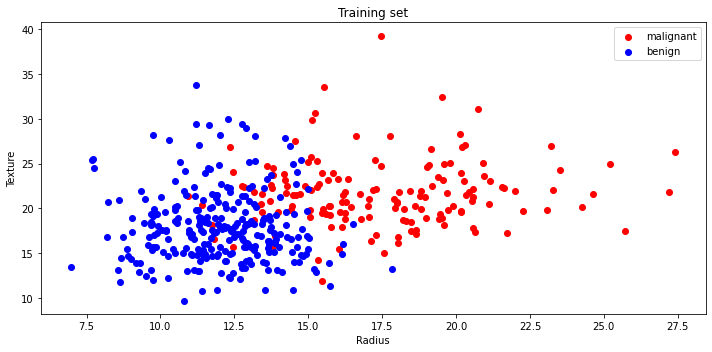

In [8]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(X_train.radius_mean.values[y_train == 1], X_train.texture_mean.values[y_train == 1], color = 'r', label = 'malignant')
ax.scatter(X_train.radius_mean.values[y_train == 0], X_train.texture_mean.values[y_train == 0], color = 'blue', label = 'benign')
ax.legend(loc = 'best')
ax.set_title('Training set')
ax.set_xlabel('Radius')
ax.set_ylabel('Texture')

fig.tight_layout()
plt.show()

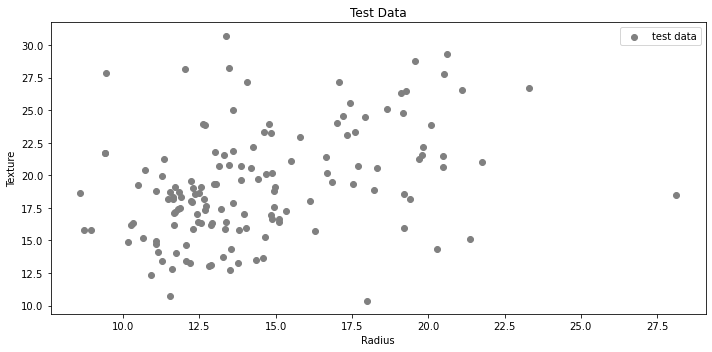

In [9]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(X_test.radius_mean.values, X_test.texture_mean.values, color = 'grey', label = 'test data')
ax.legend(loc = 'best')
ax.set_title('Test Data')
ax.set_xlabel('Radius')
ax.set_ylabel('Texture')

fig.tight_layout()
plt.show()

## KNN

In [10]:
model = KNN(k = 5)

In [11]:
model.fit(X_train.values, y_train.values)

In [12]:
y_pred = model.predict(X_test.values)

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
confusion_matrix(y_test, y_pred)

array([[80,  8],
       [11, 44]])

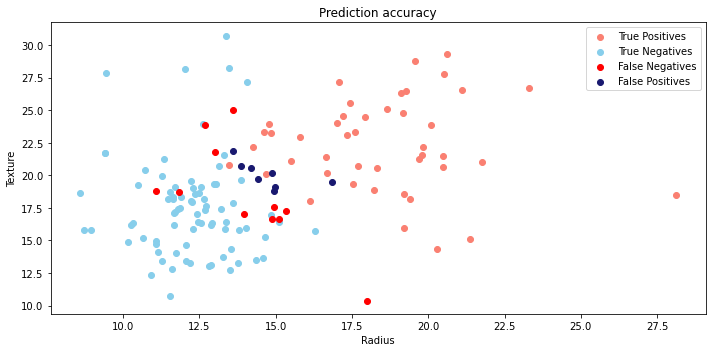

In [29]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(X_test.radius_mean.values[(y_test.values==1)*(y_pred==1)], \
           X_test.texture_mean.values[(y_test.values==1)*(y_pred==1)],\
           color = 'Salmon', label = 'True Positives')

ax.scatter(X_test.radius_mean.values[(y_test.values==0)*(y_pred==0)], \
           X_test.texture_mean.values[(y_test.values==0)*(y_pred==0)],\
           color = 'skyblue', label = 'True Negatives')

ax.scatter(X_test.radius_mean.values[(y_test.values==1)*(y_pred==0)], \
           X_test.texture_mean.values[(y_test.values==1)*(y_pred==0)],\
           color = 'red', label = 'False Negatives')
ax.scatter(X_test.radius_mean.values[(y_test.values==0)*(y_pred==1)], \
           X_test.texture_mean.values[(y_test.values==0)*(y_pred==1)],\
           color = 'midnightblue', label = 'False Positives')

ax.legend(loc = 'best')
ax.set_title('Prediction accuracy')
ax.set_xlabel('Radius')
ax.set_ylabel('Texture')

fig.tight_layout()
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score

roc_auc_score()